In [111]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [112]:
# Loading the preprocessed iris dataset
file_path = Path("crypto_data.csv")
crypto_data = pd.read_csv(file_path)
crypto_data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [113]:
crypto_data.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [114]:
crypto_data_traded = crypto_data[crypto_data['IsTrading']==True]
crypto_data_traded

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [115]:
crypto_data_traded = crypto_data_traded.drop(columns = ["IsTrading"])
crypto_data_traded.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [116]:
# Find null values
for column in crypto_data_traded.columns:
    print(f"Column {column} has {crypto_data_traded[column].isnull().sum()} null values")


Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [117]:
crypto_data_traded = crypto_data_traded.dropna()

In [118]:
# Find null values
for column in crypto_data_traded.columns:
    print(f"Column {column} has {crypto_data_traded[column].isnull().sum()} null values")


Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [119]:
crypto_data_traded

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [120]:
crypto_data_traded = crypto_data_traded.loc[crypto_data_traded["TotalCoinsMined"] >0,:]
crypto_data_traded

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [121]:
crypto_data_traded = crypto_data_traded.drop(columns = ["CoinName"])
crypto_data_traded

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [122]:
X_dummies = pd.get_dummies(crypto_data_traded)
print(X_dummies.columns)
X_dummies

Index(['TotalCoinsMined', 'Unnamed: 0_1337', 'Unnamed: 0_1CR',
       'Unnamed: 0_404', 'Unnamed: 0_42', 'Unnamed: 0_8BIT', 'Unnamed: 0_AAC',
       'Unnamed: 0_ABJ', 'Unnamed: 0_ABS', 'Unnamed: 0_ABY',
       ...
       'TotalCoinSupply_91388946', 'TotalCoinSupply_92000000000',
       'TotalCoinSupply_9354000', 'TotalCoinSupply_9507271',
       'TotalCoinSupply_9736000', 'TotalCoinSupply_98000000',
       'TotalCoinSupply_98100000000', 'TotalCoinSupply_990000000000',
       'TotalCoinSupply_999481516', 'TotalCoinSupply_9999999'],
      dtype='object', length=909)


,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_dummies)
scaled_data

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, 23.04343724, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [124]:
final_df = pd.DataFrame(scaled_data)
final_df

,0,1,2,3,4,5,6,7,8,9,...,899,900,901,902,903,904,905,906,907,908
0,-0.117108,-0.043396,-0.043396,-0.043396,23.043437,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.043396,-0.043396,23.043437,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,23.043437,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
528,-0.116781,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
529,-0.095613,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
530,-0.116948,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


In [125]:
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(scaled_data)

In [126]:
pca.explained_variance_ratio_

array([0.00458275, 0.00441599, 0.00440873, 0.00440873, 0.00439698,
       0.00417911, 0.00399131, 0.00395332, 0.00382562, 0.00363754,
       0.00354395, 0.0034902 , 0.00346206, 0.00340776, 0.00338093,
       0.00330963, 0.00330871, 0.00330655, 0.00330655, 0.00330655,
       0.00330655, 0.00330655, 0.00330655, 0.00330648, 0.00330483,
       0.00328966, 0.00327172, 0.00326623, 0.00321293, 0.00318048,
       0.00316861, 0.00316216, 0.00315996, 0.00314108, 0.00312424,
       0.0031137 , 0.00310847, 0.00310321, 0.00308557, 0.00307458,
       0.00303845, 0.00303296, 0.0030183 , 0.00301373, 0.00300257,
       0.00299494, 0.00299387, 0.00298751, 0.0029855 , 0.00298157,
       0.00296377, 0.00295936, 0.00295555, 0.00293021, 0.00292564,
       0.0028761 , 0.00286206, 0.00283905, 0.00278385, 0.00276602,
       0.00273414, 0.00268138, 0.00267446, 0.00266588, 0.00265738,
       0.00261594, 0.0025889 , 0.00257803, 0.00255124, 0.00253077,
       0.00251547, 0.00241553, 0.0023417 , 0.00224803, 0.00222

In [127]:
pca_df = pd.DataFrame(crypto_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.306478,-0.134248,-2.567847e-15,-1.442737e-14,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,-0.000000e+00,-0.000000e+00,5.917241e-16,2.215320e-19,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
1,-0.286779,-0.135378,7.433740e-16,-1.797819e-14,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,-4.601236e-15,1.302178e-14,8.279457e-16,-1.057281e-16,2.506556e-15,-1.486817e-16,3.566022e-15,2.475690e-15,-2.655374e-15,-7.564581e-17
2,0.361159,-0.003304,-3.210345e-15,-4.534394e-16,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,-2.314599e-15,-4.859521e-15,-9.131104e-15,-1.002232e-15,2.611704e-15,-5.347171e-15,-1.001093e-15,1.807247e-16,-3.782215e-15,5.188829e-16
3,-0.287881,-0.256431,-7.425722e-15,-3.300552e-14,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,-1.822688e+00,2.974025e-01,1.073856e+00,-1.048815e+00,8.321595e-01,2.721860e+00,1.162514e+00,-2.000870e+00,1.125042e+00,-1.392129e+00
4,-0.136884,-0.256819,-8.191243e-15,-3.557103e-14,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,-1.704392e+00,-1.163227e+00,1.154593e+00,-8.650385e-01,-6.539892e-01,-1.586896e+00,1.537657e+00,-1.147037e+00,-1.239488e-01,2.543553e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.986464,-0.234495,-1.789618e-15,-3.768663e-14,-1.054757,-0.022428,0.022512,-0.350649,1.203274,0.152063,...,1.568930e-14,-2.420979e-14,-2.963646e-15,8.490446e-15,1.682069e-15,-9.952244e-15,-1.986444e-14,-3.972888e-14,-4.052986e-14,8.170052e-15
528,-0.311155,-0.186258,-2.307495e-15,-1.984579e-14,0.022867,0.849673,-0.274454,0.163274,-1.779116,-0.495436,...,-1.376457e-01,1.594225e-01,3.919266e-01,-1.100434e-01,-1.200044e+00,-6.029058e-01,2.666346e+00,1.831035e+00,-5.672027e-01,-7.530670e-01
529,-0.076558,-0.359258,-4.108337e-15,-4.078202e-14,-0.077205,-3.531071,0.473749,0.020852,0.383523,0.177536,...,-1.501848e-15,-1.171692e-14,-1.281577e-15,-5.126307e-15,-1.982019e-15,-2.503080e-16,-4.405420e-16,-2.382932e-15,-4.004927e-17,-6.096563e-16
530,-0.333347,-0.283921,-3.722235e-15,-3.178696e-14,0.011813,-2.475848,0.283016,-0.068158,0.528642,0.314484,...,1.289730e+00,9.068348e-01,2.432362e-01,-1.664426e-01,3.362895e-01,-4.496953e-01,-1.731981e-02,2.045901e+00,2.312850e-01,8.877763e-01


In [169]:
tsne = TSNE(learning_rate = 2)

In [170]:
tsne_features = tsne.fit_transform(pca_df)

In [171]:
tsne_features.shape

(532, 2)

In [172]:
pca_df['x'] = tsne_features[:,0]
pca_df['y'] = tsne_features[:,1]

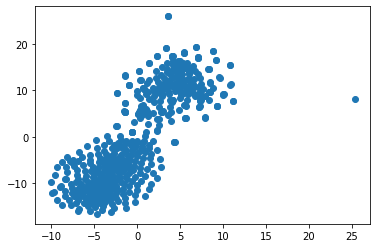

In [173]:
plt.scatter(pca_df['x'], pca_df['y'])
plt.show()

In [176]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\i0211026\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,504383.329914
1,2,449573.623363
2,3,447876.941050
3,4,443810.552080
4,5,440555.349522


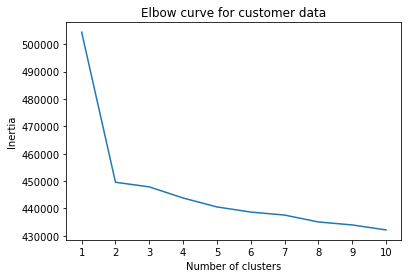

In [177]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [178]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [179]:
clusters = get_clusters(2, pca_df)

In [180]:
clusters

,0,1,2,3,4,5,6,7,8,9,...,434,435,436,437,438,439,440,x,y,class
0,-0.306478,-0.134248,-2.567847e-15,-1.442737e-14,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,2.215320e-19,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-3.749760,-6.215258,0
1,-0.286779,-0.135378,7.433740e-16,-1.797819e-14,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,-1.057281e-16,2.506556e-15,-1.486817e-16,3.566022e-15,2.475690e-15,-2.655374e-15,-7.564581e-17,-1.262039,-0.816163,0
2,0.361159,-0.003304,-3.210345e-15,-4.534394e-16,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,-1.002232e-15,2.611704e-15,-5.347171e-15,-1.001093e-15,1.807247e-16,-3.782215e-15,5.188829e-16,6.479130,9.531757,1
3,-0.287881,-0.256431,-7.425722e-15,-3.300552e-14,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,-1.048815e+00,8.321595e-01,2.721860e+00,1.162514e+00,-2.000870e+00,1.125042e+00,-1.392129e+00,-5.560419,-12.469232,0
4,-0.136884,-0.256819,-8.191243e-15,-3.557103e-14,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,-8.650385e-01,-6.539892e-01,-1.586896e+00,1.537657e+00,-1.147037e+00,-1.239488e-01,2.543553e+00,1.275600,9.604753,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.986464,-0.234495,-1.789618e-15,-3.768663e-14,-1.054757,-0.022428,0.022512,-0.350649,1.203274,0.152063,...,8.490446e-15,1.682069e-15,-9.952244e-15,-1.986444e-14,-3.972888e-14,-4.052986e-14,8.170052e-15,5.017987,14.559159,1
528,-0.311155,-0.186258,-2.307495e-15,-1.984579e-14,0.022867,0.849673,-0.274454,0.163274,-1.779116,-0.495436,...,-1.100434e-01,-1.200044e+00,-6.029058e-01,2.666346e+00,1.831035e+00,-5.672027e-01,-7.530670e-01,8.505308,9.636907,1
529,-0.076558,-0.359258,-4.108337e-15,-4.078202e-14,-0.077205,-3.531071,0.473749,0.020852,0.383523,0.177536,...,-5.126307e-15,-1.982019e-15,-2.503080e-16,-4.405420e-16,-2.382932e-15,-4.004927e-17,-6.096563e-16,-5.910062,-2.023694,0
530,-0.333347,-0.283921,-3.722235e-15,-3.178696e-14,0.011813,-2.475848,0.283016,-0.068158,0.528642,0.314484,...,-1.664426e-01,3.362895e-01,-4.496953e-01,-1.731981e-02,2.045901e+00,2.312850e-01,8.877763e-01,0.464641,5.065796,1


In [182]:
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

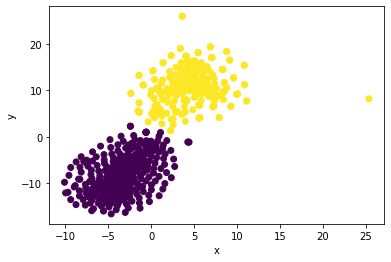

In [183]:
show_clusters(clusters)

In [184]:
# Based on your findings, make a brief (1-2 sentences) recommendation to your clients. 
# Can the cryptocurrencies be clustered together? If so, into how many clusters?

# Answer : 
# Yes, the crypto currencies can be clustered together. 
# As seen on the chart above, we can cluster them into 2 groups. 